In [1]:
import json
import os
import matplotlib.pyplot as plt

In [2]:

def get_history(file_path):     
    fp = open(file_path, 'r')
    hist = json.load(fp)

    result = []
    for i in range(len(hist)):
        if(hist[i]['data'] != None):
            accuracy = hist[i]['data']['validation_accuracy']
            test_accuracy = hist[i]['data']['test_accuracy']
            cost = hist[i]['data']['training_time']
            result.append((cost, accuracy, test_accuracy))

    return result

In [3]:
def preprocess(history):
    best = [0.]
    hist = [0.]
    cost = [0.]
    aggt_cost = 0.
    best_acc = 0.
    for i in range(len(history)):
        aggt_cost += history[i][0]
        acc = history[i][1]
        best_acc = history[i][1] if history[i][1] > best_acc else best_acc
        hist.append(acc)
        best.append(best_acc)
        cost.append(aggt_cost)
    
    return cost, hist, best

Text(0.5, 1.0, 'Random search trajectories (red=hist, blue=best)')

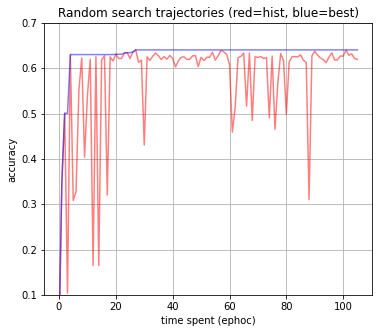

In [13]:

hist_file = '/Users/mosass/Working/github.com/mosass/nas-tf2/out/history/ga-03-history.json'
history = get_history(hist_file)
cost, hist, best = preprocess(history)

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.plot(hist, label='hist', color='red', alpha=0.5)
plt.plot(best, label='best', color='blue', alpha=0.5)

plt.ylabel('accuracy')
plt.xlabel('time spent (ephoc)')
plt.ylim(0.1, 0.7)
plt.grid()
plt.title('Random search trajectories (red=hist, blue=best)')

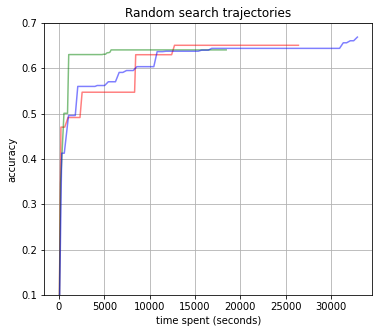

In [16]:
def plot_best(hists) :
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)

    for h_file in hists:
        history = get_history(h_file[0])
        cost, hist, best = preprocess(history)
        plt.plot(cost, best, label='best', color=h_file[1], alpha=0.5)
    plt.ylabel('accuracy')
    plt.xlabel('time spent (seconds)')
    plt.ylim(0.1, 0.7)
    plt.grid()
    plt.title('Random search trajectories')

hists = [
    ('/Users/mosass/Working/github.com/mosass/nas-tf2/out/history/ga-02-history.json', 'red'),
    ('/Users/mosass/Working/github.com/mosass/nas-tf2/out/history/ga-03-history.json', 'green'),
    ('/Users/mosass/Working/github.com/mosass/nas-tf2/out/history/re-03-history.json', 'blue')
]

plot_best(hists)